In [1]:
# !pip install googletrans

In [2]:
from textblob import TextBlob
import pandas as pd

In [3]:
from textblob import TextBlob

def getSubjectivity(review) :
    return TextBlob(review).sentiment.subjectivity

def getPolarity(review) :
    return TextBlob(review).sentiment.polarity

def analyze(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [4]:
df = pd.read_csv('3.2_translated_processed_data_g20.csv')
df.head()

final_data = pd.DataFrame(df[['date', 'username', 'tweet_en']])
final_data.head()

,date,username,tweet_en
0,2022-10-05 12:21:14,jeslintuse2,East Nusa Tenggara Government Ensures that all...
1,2022-10-05 12:17:55,usharanimuni,The government makes sure the hotel in Bali is...
2,2022-10-05 12:13:03,diaharmayanti1,The government makes sure the hotel in Bali is...
3,2022-10-05 12:12:31,SeptianiMestika,Bali Compendium will be brought by Indonesia t...
4,2022-10-05 12:11:59,diaharmayanti1,Indonesian telecommunications network readines...


In [5]:
final_data[ 'Subjectivity'] = final_data['tweet_en'].apply(getSubjectivity)
final_data['Polarity'] = final_data['tweet_en'].apply(getPolarity)
final_data['Analysis'] = final_data['Polarity'].apply(analyze)
final_data.head()

final_data.to_csv('4_sentiment_analysis_data_g20.csv', index=False)

In [6]:
tb_counts = final_data.Analysis.value_counts()
tb_counts

Positive    513
Neutral     494
Negative     59
Name: Analysis, dtype: int64

In [7]:
j=1
sortedDF = final_data.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+ sortedDF['tweet_en'][i])
        print()
        j = j + 1

1) Minister of Communication and Information Johnny Not Plate Kemkominfo has prepared Media Center Summit G20 with a capacity for 1 500 media centers located at BICC Hotel Westin Nusa Dua Bali and will operate starting on the 13th of November 17, 2022

2) Luhut Pandjaitan's orders in Bali firmly invited local drivers to be involved in the G20 Summit

3) Order Coordinating Minister Marves Luhut Pandjaitan in Bali firmly invited local drivers to take advantage by being involved in the G20 Luhutpandjaitan Summit

4) The Ministry of Communication and Information prepares a media center that can accommodate up to 1 500 journalists covered the high level conference of the G20 Summit in the Bali International Convention Center BICC Nusa Dua Bali Province on 15 November 1622

5) The Minister of Communication and Information said that he had prepared the Media Center for the G20 Summit with a capacity for 1 500 media centers located at the Bali International Convention Center BICC Hotel Westin 

([<matplotlib.patches.Wedge at 0x226fbdedaf0>,
 [Text(0.0647983297446155, 1.0980897852463196, 'Positive'),
  Text(-0.25379425680880513, -1.070321669037335, 'Neutral'),
  Text(1.3296437187814942, -0.23355423589590224, 'Negative')],
 [Text(0.035344543497062994, 0.5989580646798106, '48.1%'),
  Text(-0.13843323098662094, -0.5838118194749099, '46.3%'),
  Text(0.8371830821957555, -0.14705266704556805, '5.5%')])

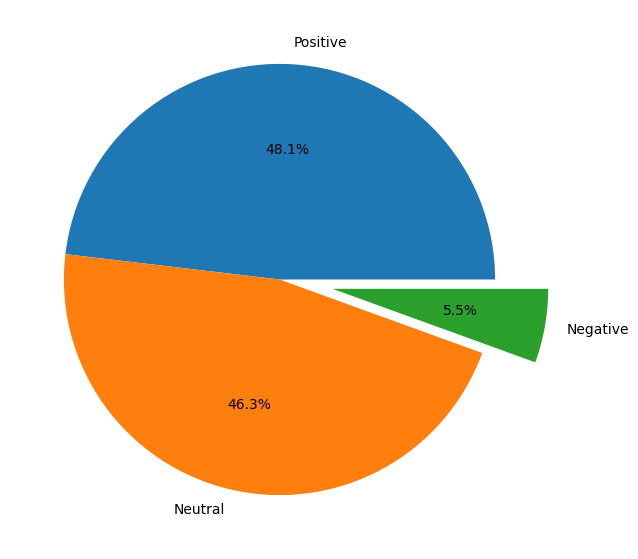

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels=tb_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)


In [13]:
# extracting the number of examples of each class
POS_data = final_data[final_data['Analysis'] == 'Positive']
NEG_data = final_data[final_data['Analysis'] == 'Negative']
NET_data = final_data[final_data['Analysis'] == 'Neutral']

<AxesSubplot: title={'center': 'Sentiment Analysis'}, xlabel='Sentimen', ylabel='Jumlah Tweet'>

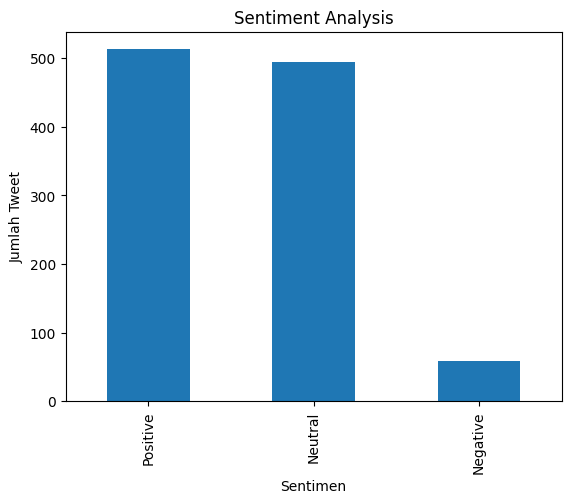

In [14]:
final_data['Analysis'].value_counts().plot(kind='bar', title='Sentiment Analysis', xlabel='Sentimen', ylabel='Jumlah Tweet')

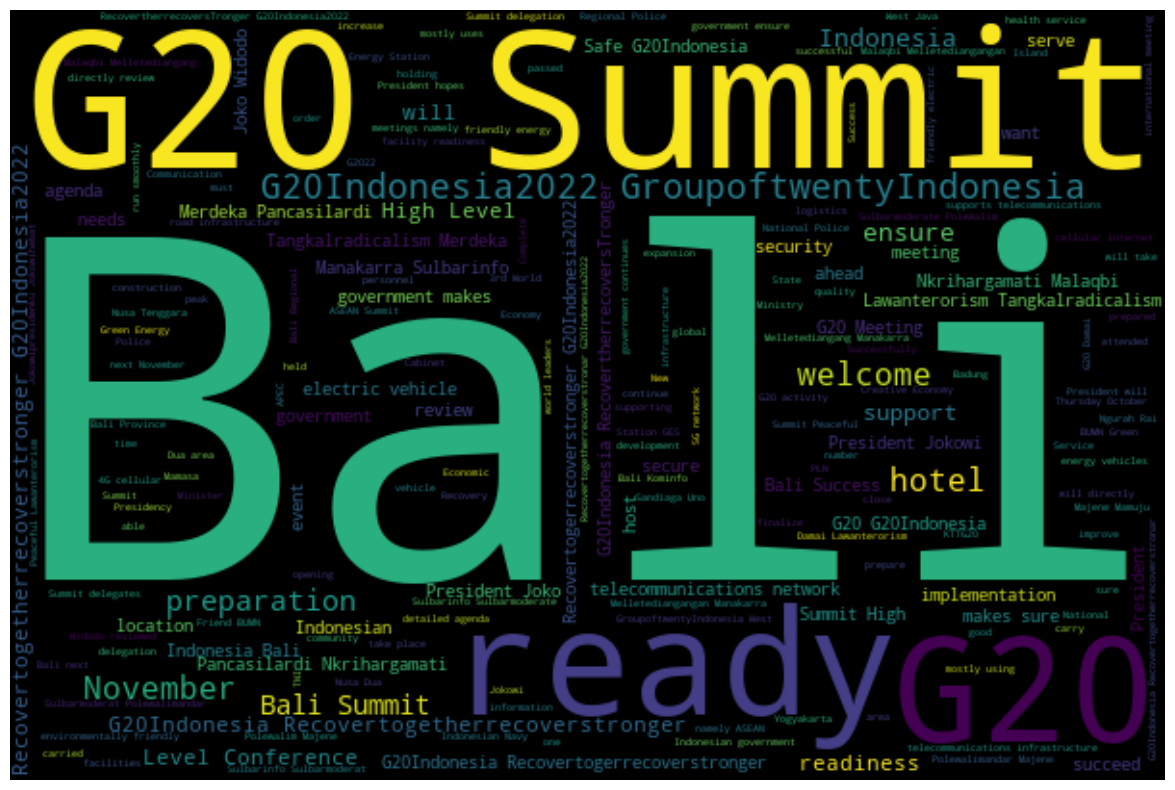

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [twts for twts in POS_data['tweet_en']])
wordCloud = WordCloud(width = 600, height=400, random_state=21, max_font_size=400).generate(allWords)

plt.figure( figsize=(20,10) )
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [17]:
from collections import defaultdict
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

# Unigrams
positive_unigrams = defaultdict(int)

for tweet in POS_data['tweet_en']:
    for word in generate_ngrams(tweet):
        positive_unigrams[word] += 1
         
df_top_positive = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive = df_top_positive.rename(columns={0:'Word',1:'Count'})

# Bigrams
positive_bigrams = defaultdict(int)

for tweet in POS_data['tweet_en']:
    for word in generate_ngrams(tweet,n_gram=2):
        positive_bigrams[word] += 1
        
df_top_positive_bi = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive_bi = df_top_positive_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
positive_trigrams = defaultdict(int)

for tweet in POS_data['tweet_en']:
    for word in generate_ngrams(tweet,n_gram=3):
        positive_trigrams[word] += 1
        
df_top_positive_tri = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive_tri = df_top_positive_tri.rename(columns={0:'Word',1:'Count'})

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MrWaradana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


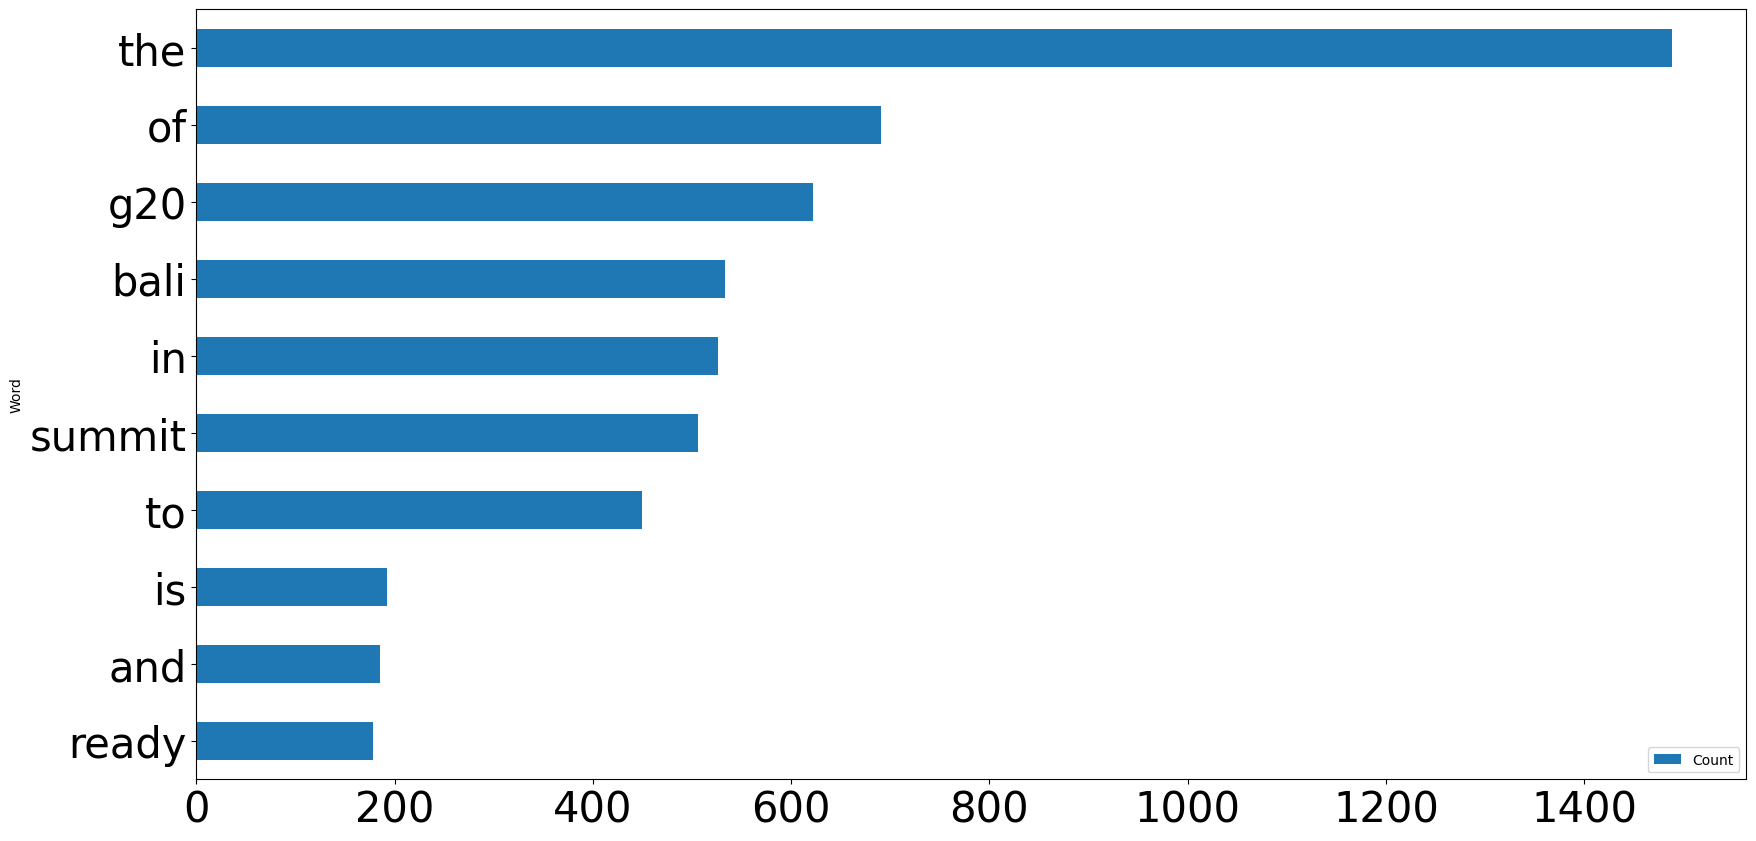

In [18]:
df_top_positive.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('positif.png',bbox_inches='tight')

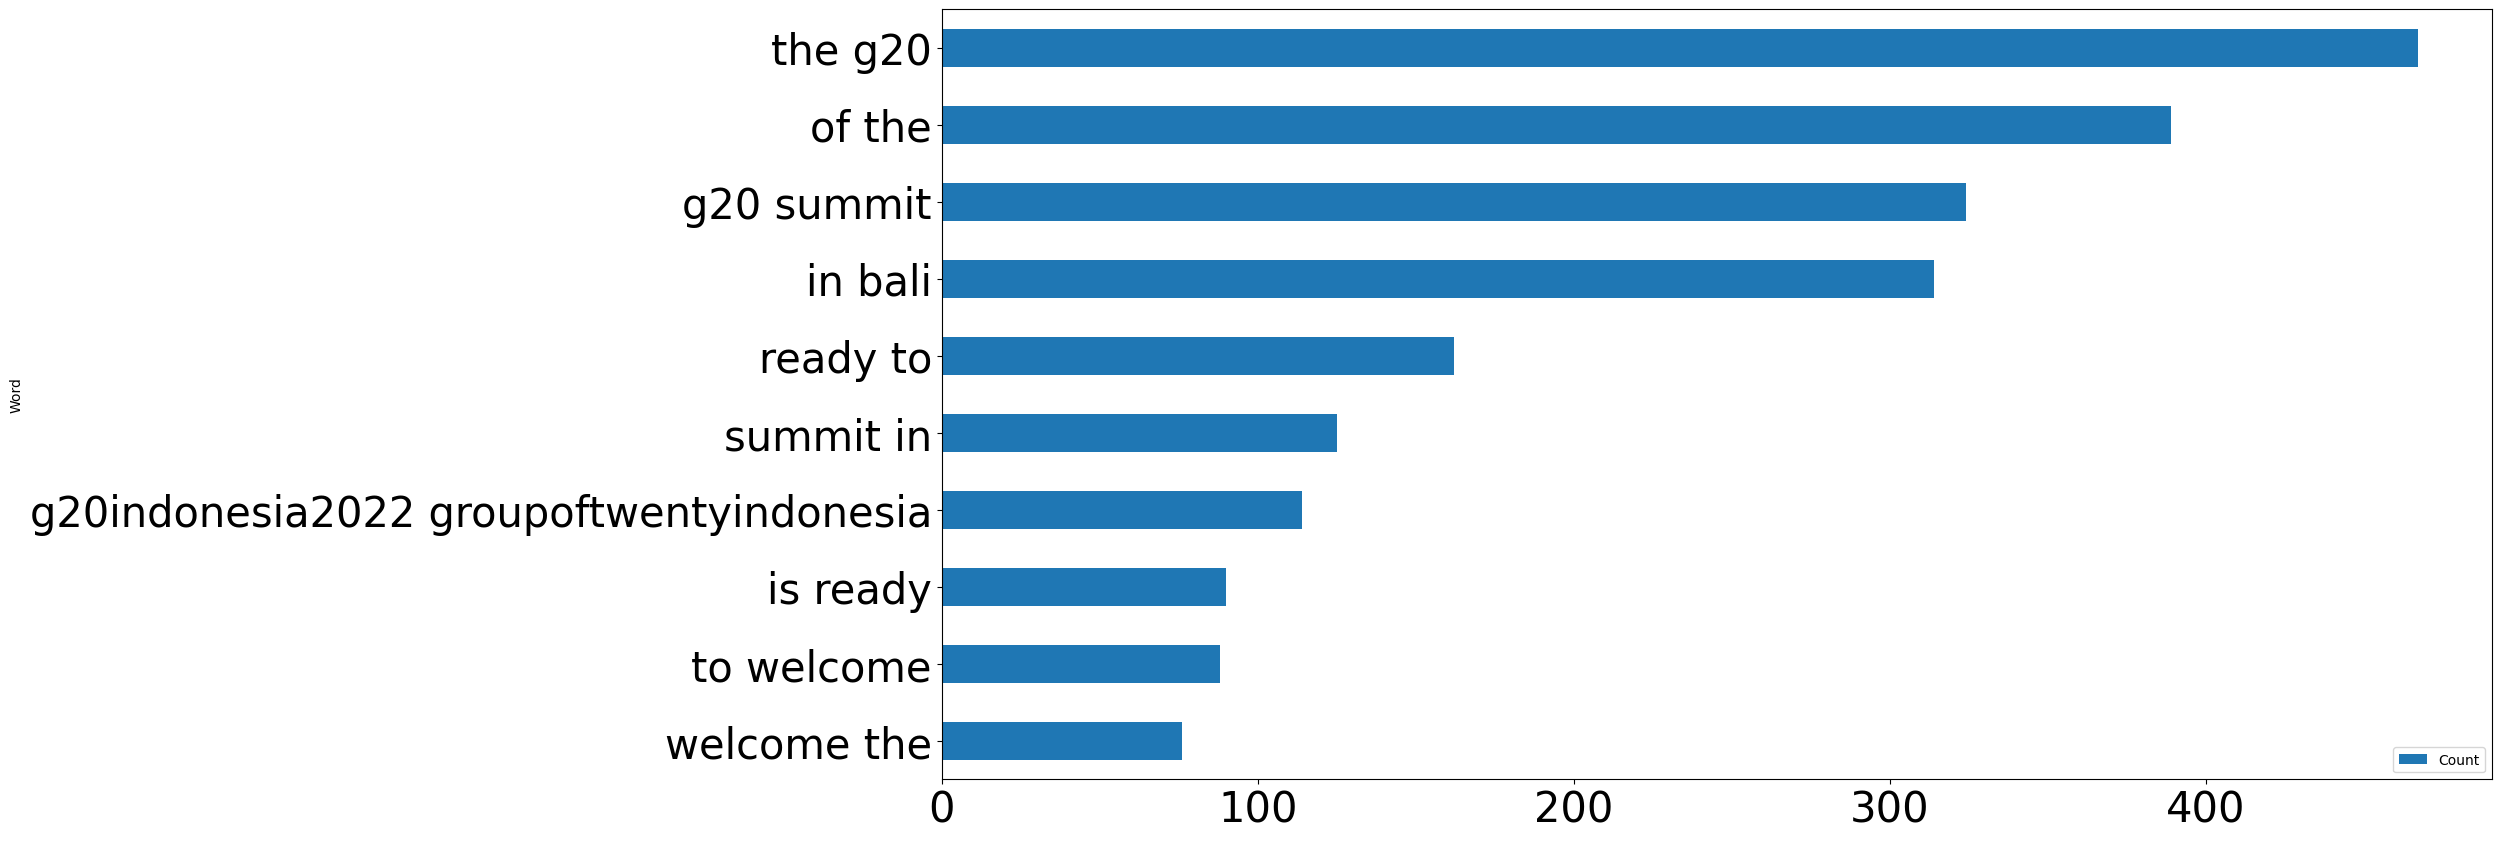

In [19]:
df_top_positive_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('positif1.png',bbox_inches='tight')

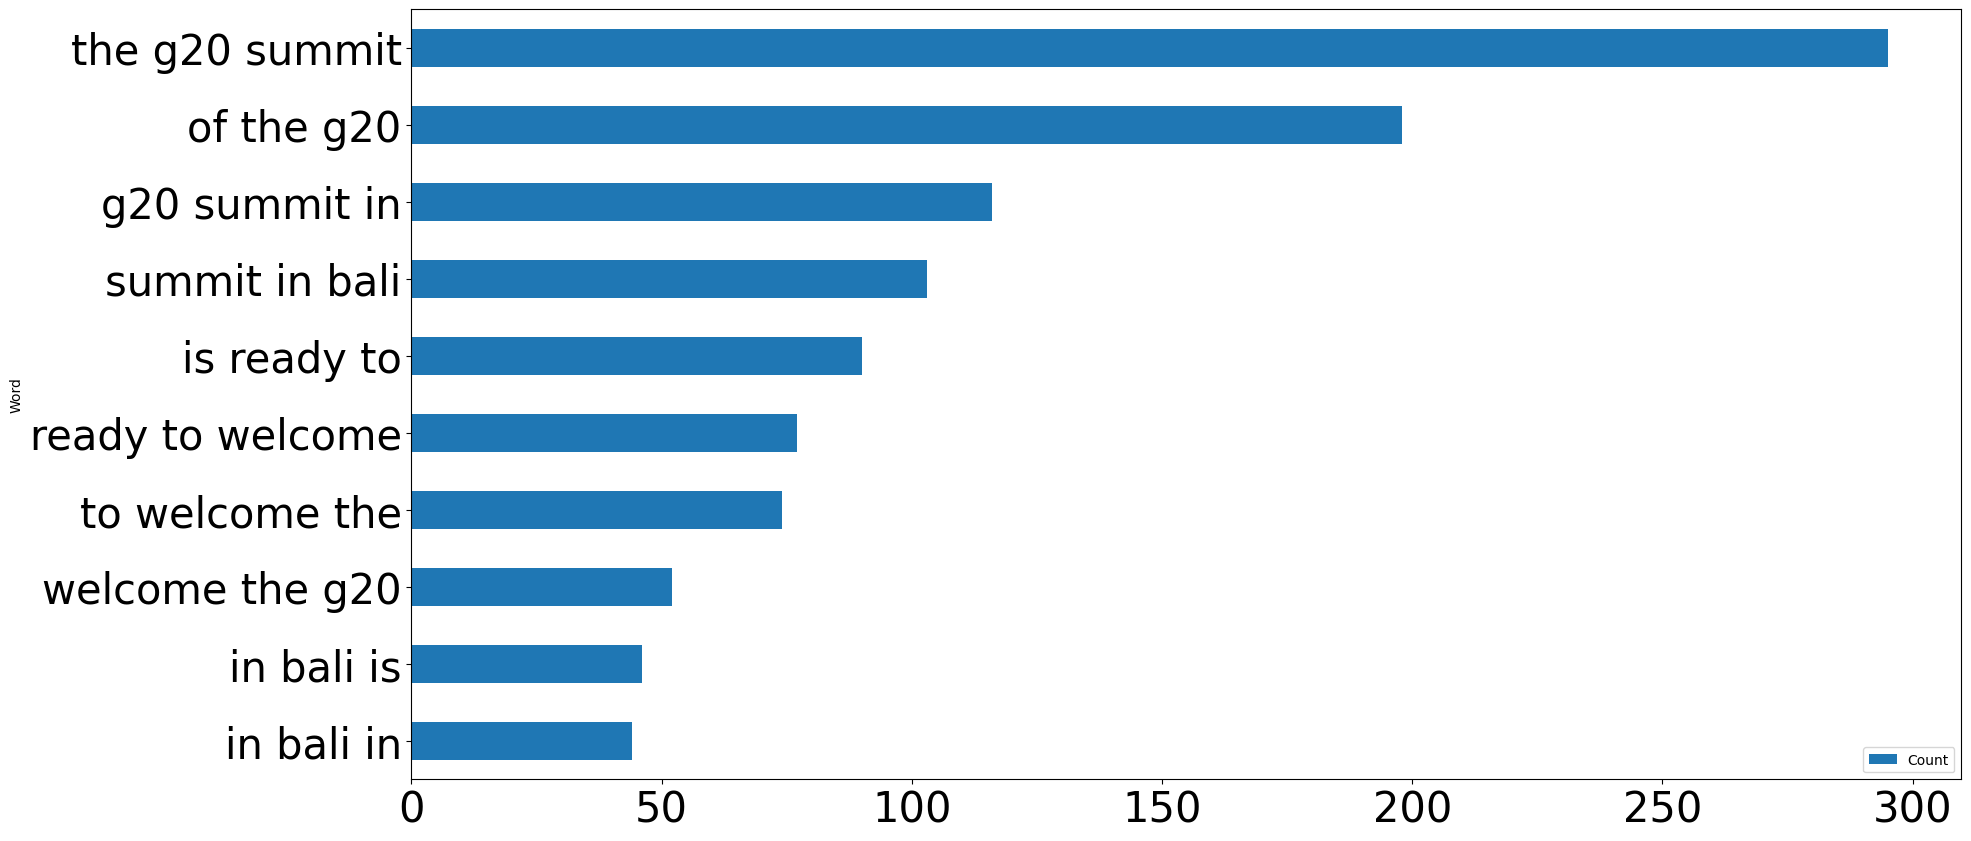

In [20]:
df_top_positive_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('positif2.png',bbox_inches='tight')

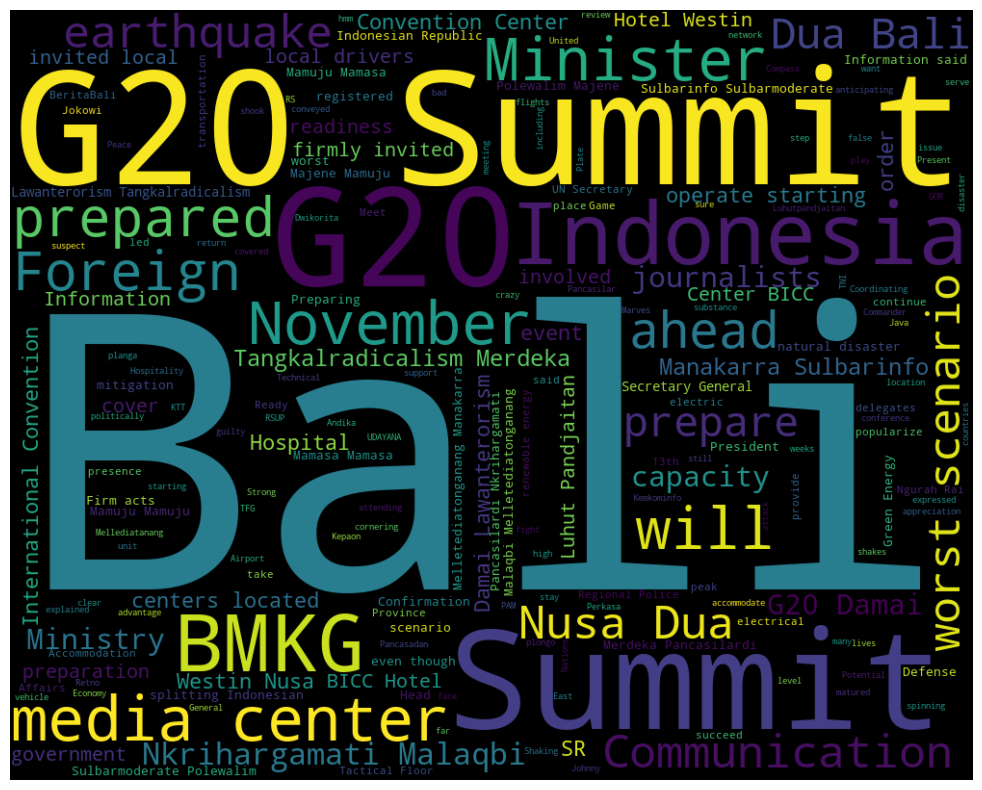

In [21]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [twts for twts in NEG_data['tweet_en']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.figure( figsize=(20,10) )
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [22]:
# Unigrams
negative_unigrams = defaultdict(int)

for tweet in NEG_data['tweet_en']:
    for word in generate_ngrams(tweet):
        negative_unigrams[word] += 1
         
df_top_negative = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative = df_top_negative.rename(columns={0:'Word',1:'Count'})

# Bigrams
negative_bigrams = defaultdict(int)

for tweet in NEG_data['tweet_en']:
    for word in generate_ngrams(tweet,n_gram=2):
        negative_bigrams[word] += 1
        
df_top_negative_bi = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative_bi = df_top_negative_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
negative_trigrams = defaultdict(int)

for tweet in NEG_data['tweet_en']:
    for word in generate_ngrams(tweet,n_gram=3):
        negative_trigrams[word] += 1
        
df_top_negative_tri = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative_tri = df_top_negative_tri.rename(columns={0:'Word',1:'Count'})

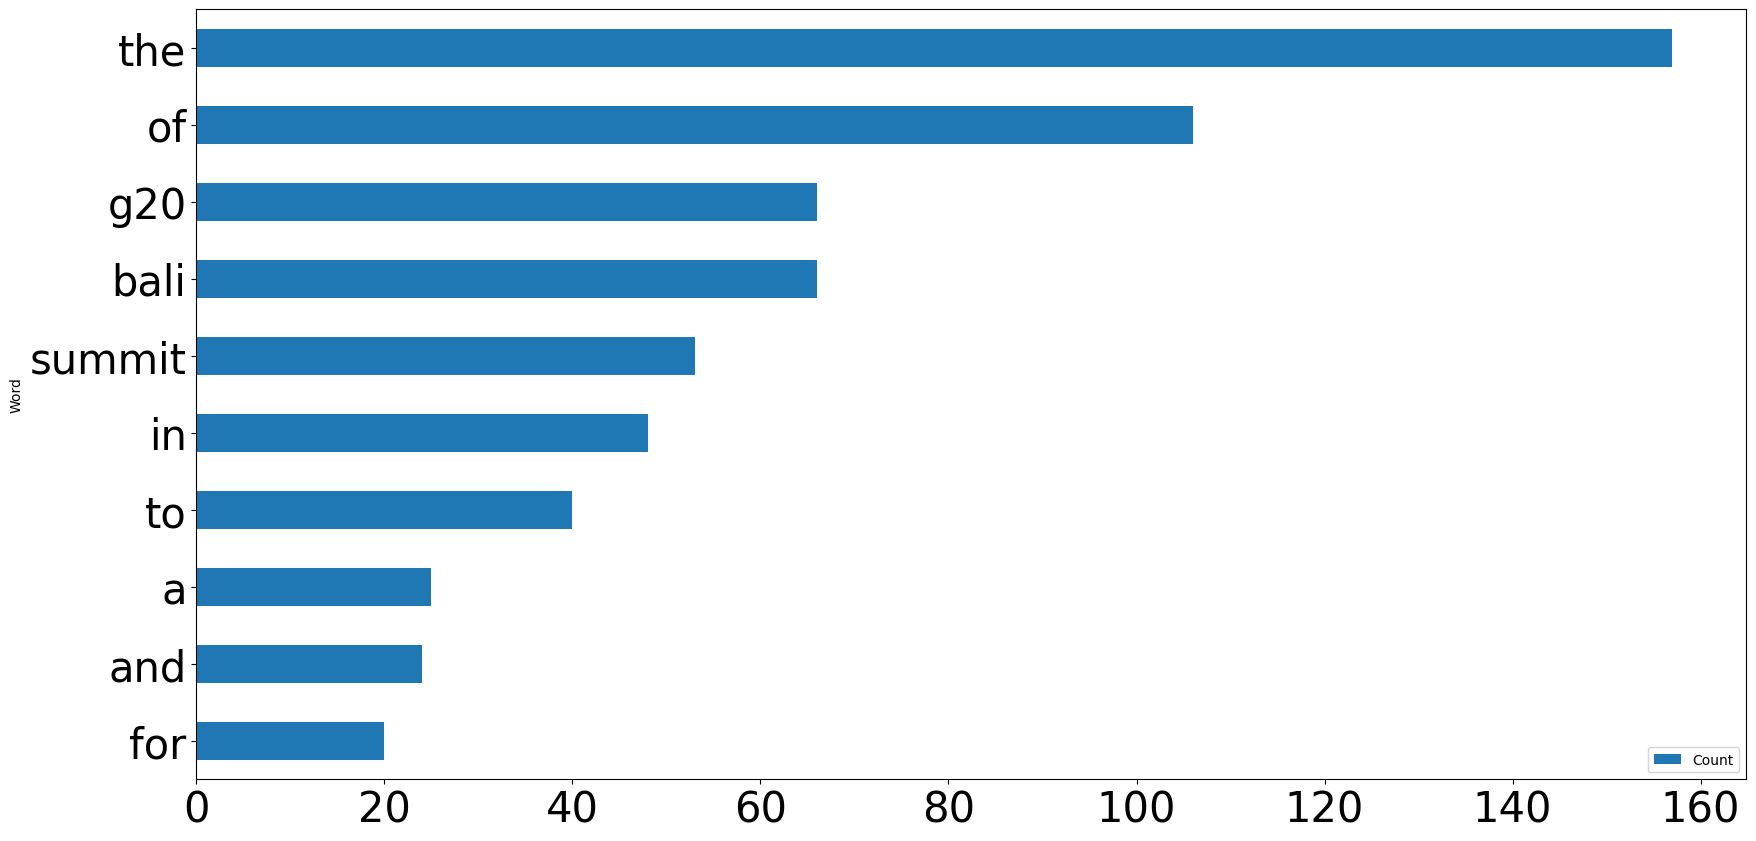

In [23]:
df_top_negative.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('negatif.png',bbox_inches='tight')

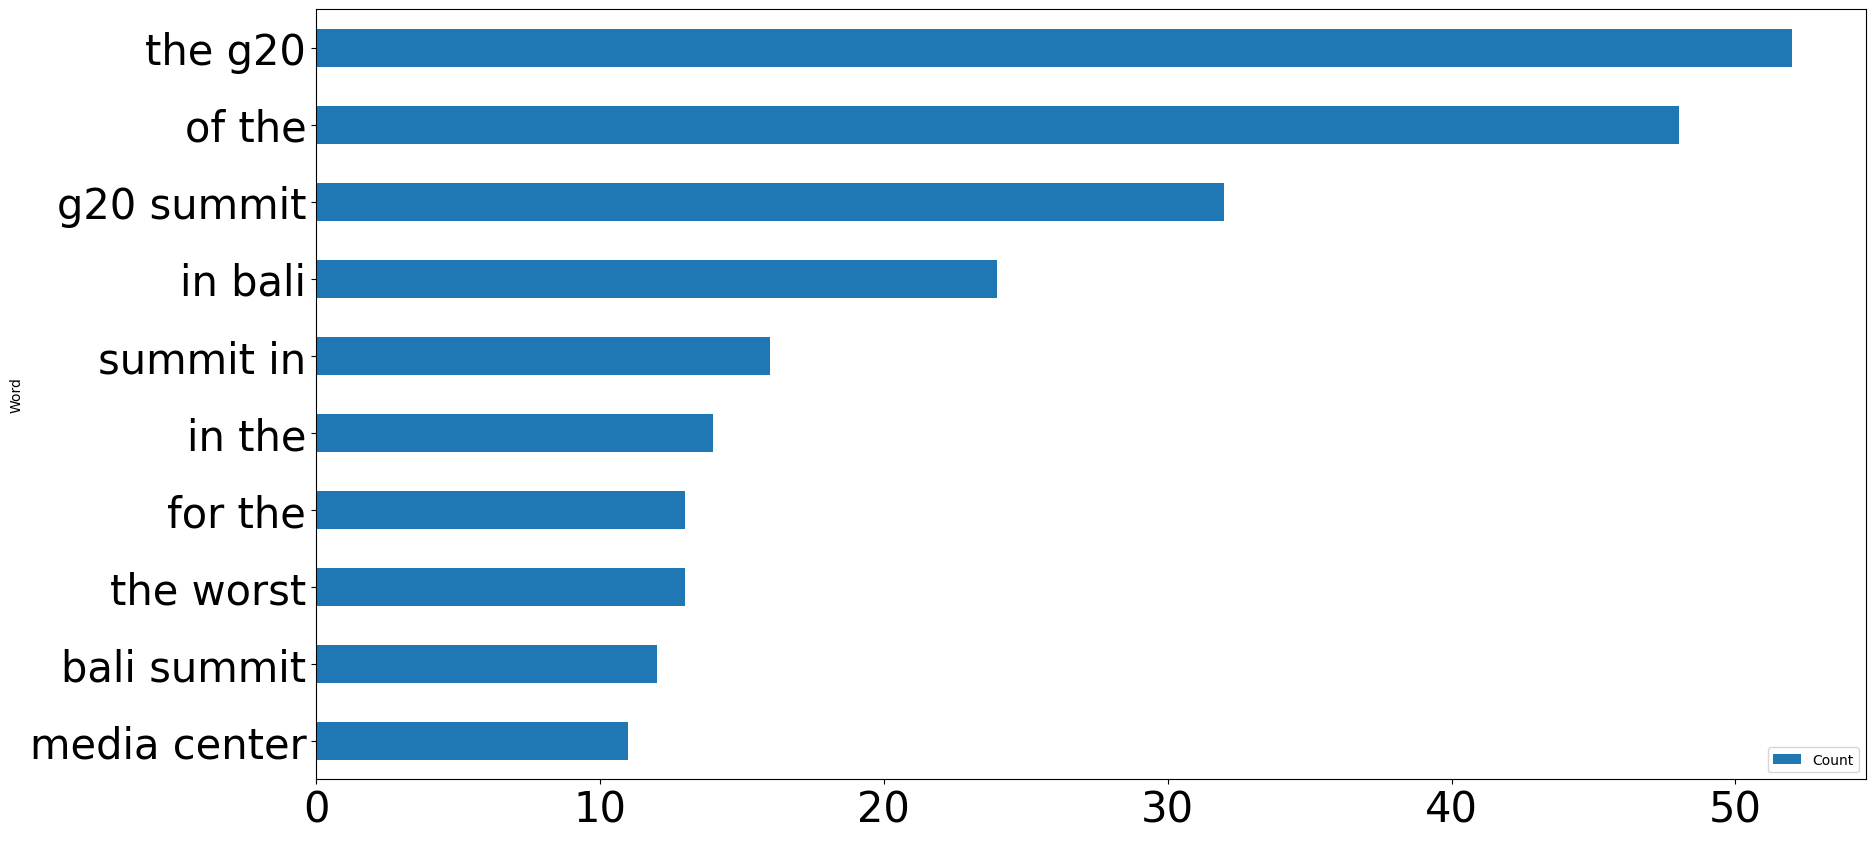

In [24]:
df_top_negative_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('negatif1.png',bbox_inches='tight')

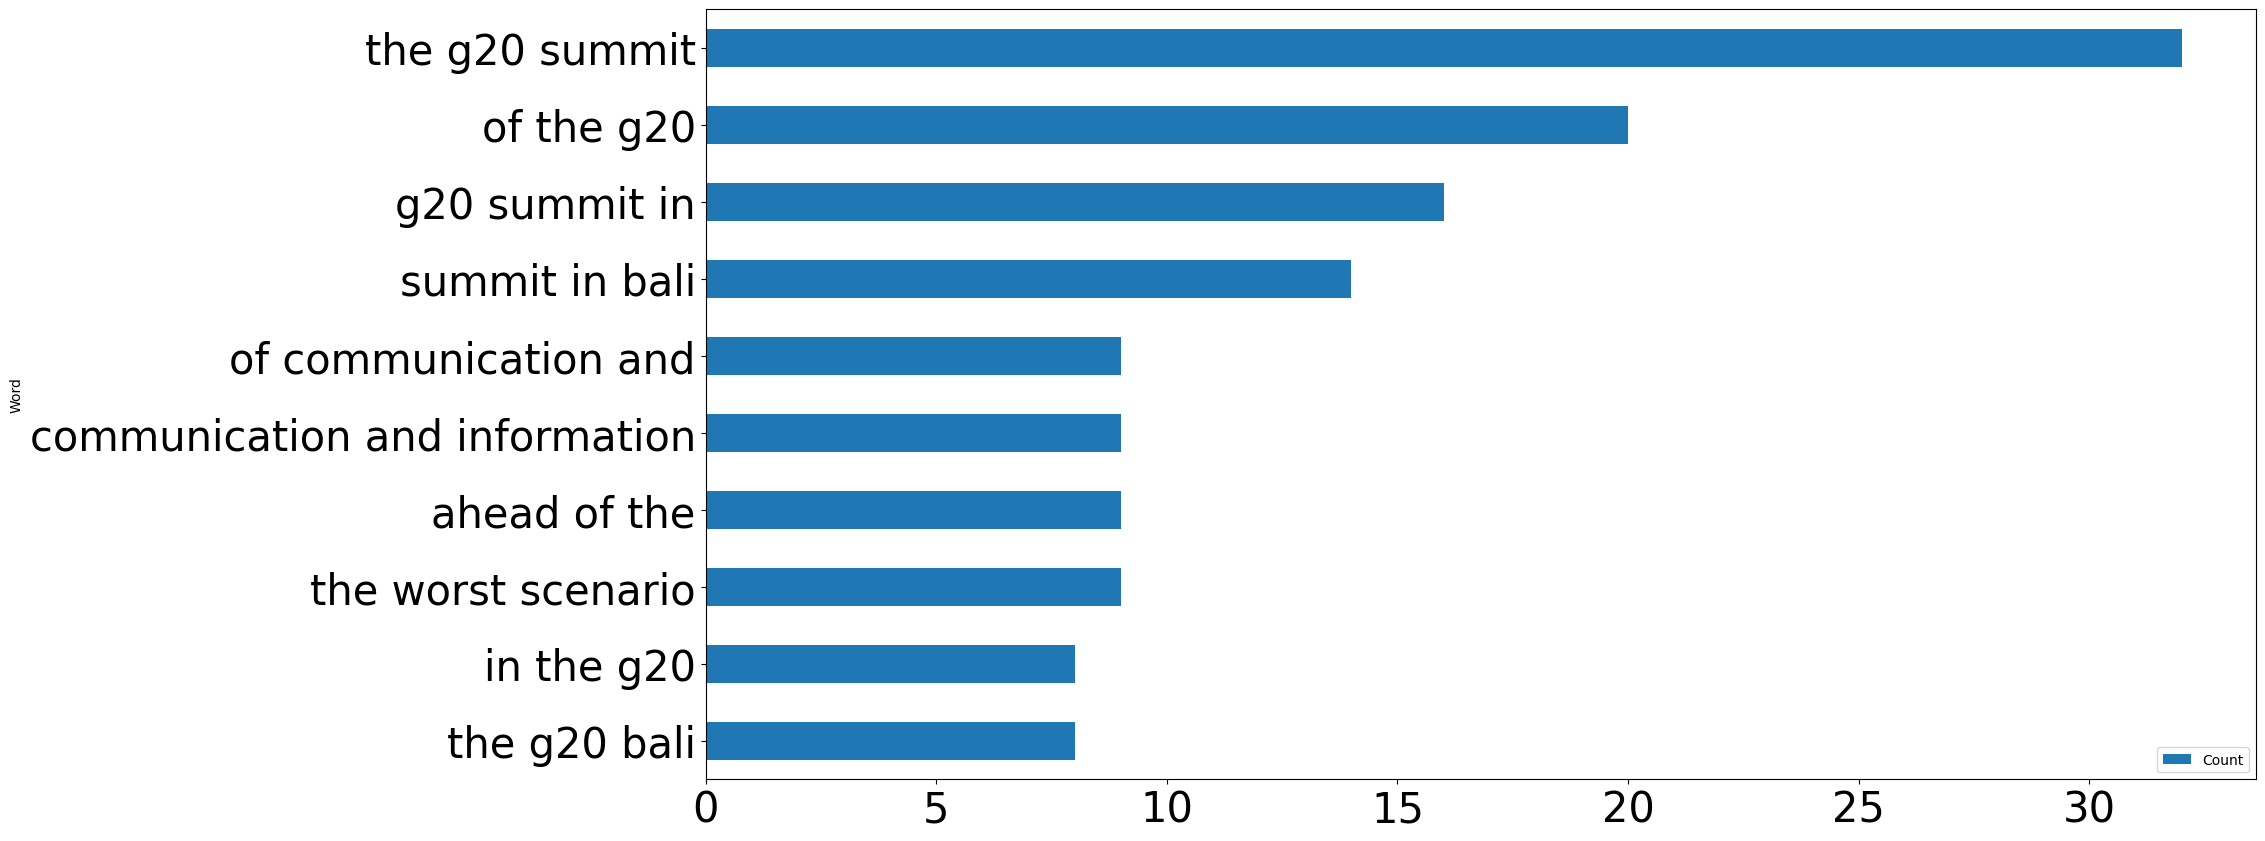

In [25]:
df_top_negative_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('negatif2.png',bbox_inches='tight')

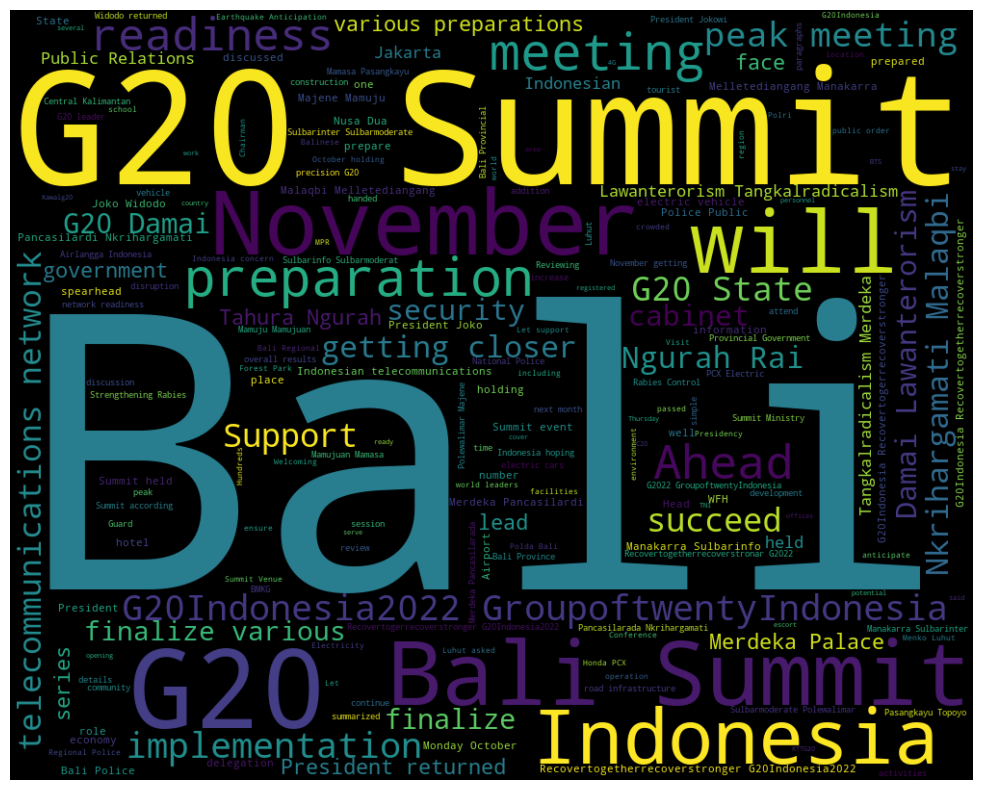

In [27]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [twts for twts in NET_data['tweet_en']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.figure( figsize=(20,10) )
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [29]:
# Unigrams
neutral_unigrams = defaultdict(int)

for tweet in NET_data['tweet_en']:
    for word in generate_ngrams(tweet):
        neutral_unigrams[word] += 1
         
df_top_neutral = pd.DataFrame(sorted(neutral_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral = df_top_neutral.rename(columns={0:'Word',1:'Count'})

# Bigrams
neutral_bigrams = defaultdict(int)

for tweet in NET_data['tweet_en']:
    for word in generate_ngrams(tweet,n_gram=2):
        neutral_bigrams[word] += 1
        
df_top_neutral_bi = pd.DataFrame(sorted(neutral_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral_bi = df_top_neutral_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
neutral_trigrams = defaultdict(int)

for tweet in NET_data['tweet_en']:
    for word in generate_ngrams(tweet,n_gram=3):
        neutral_trigrams[word] += 1
        
df_top_neutral_tri = pd.DataFrame(sorted(neutral_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral_tri = df_top_neutral_tri.rename(columns={0:'Word',1:'Count'})

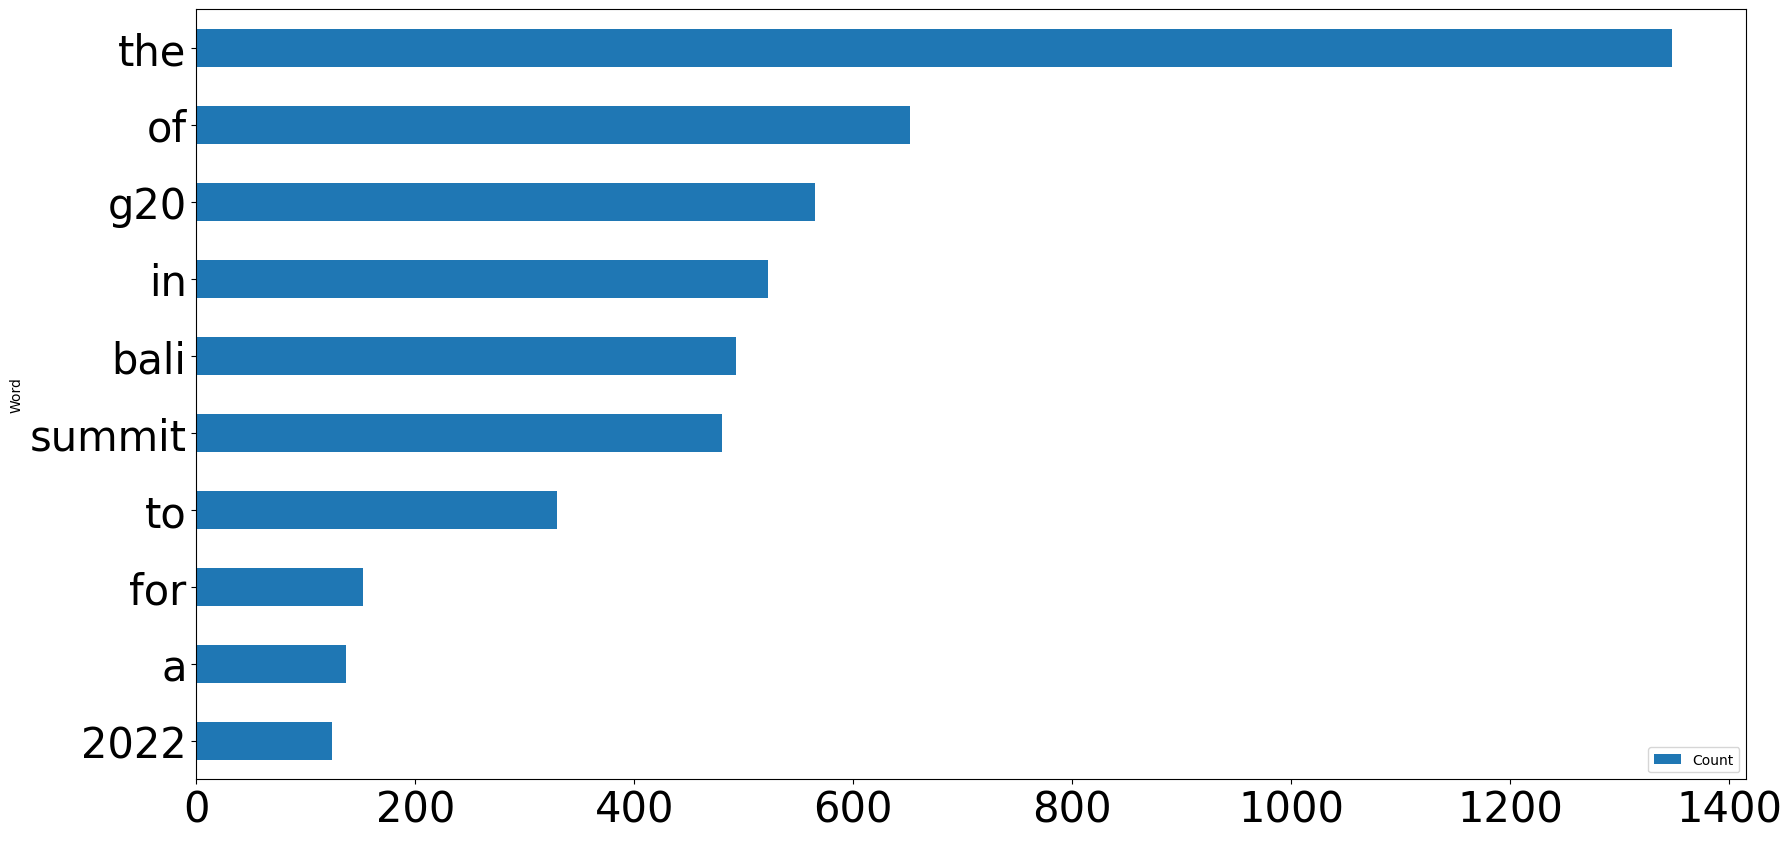

In [30]:
df_top_neutral.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('netral.png',bbox_inches='tight')

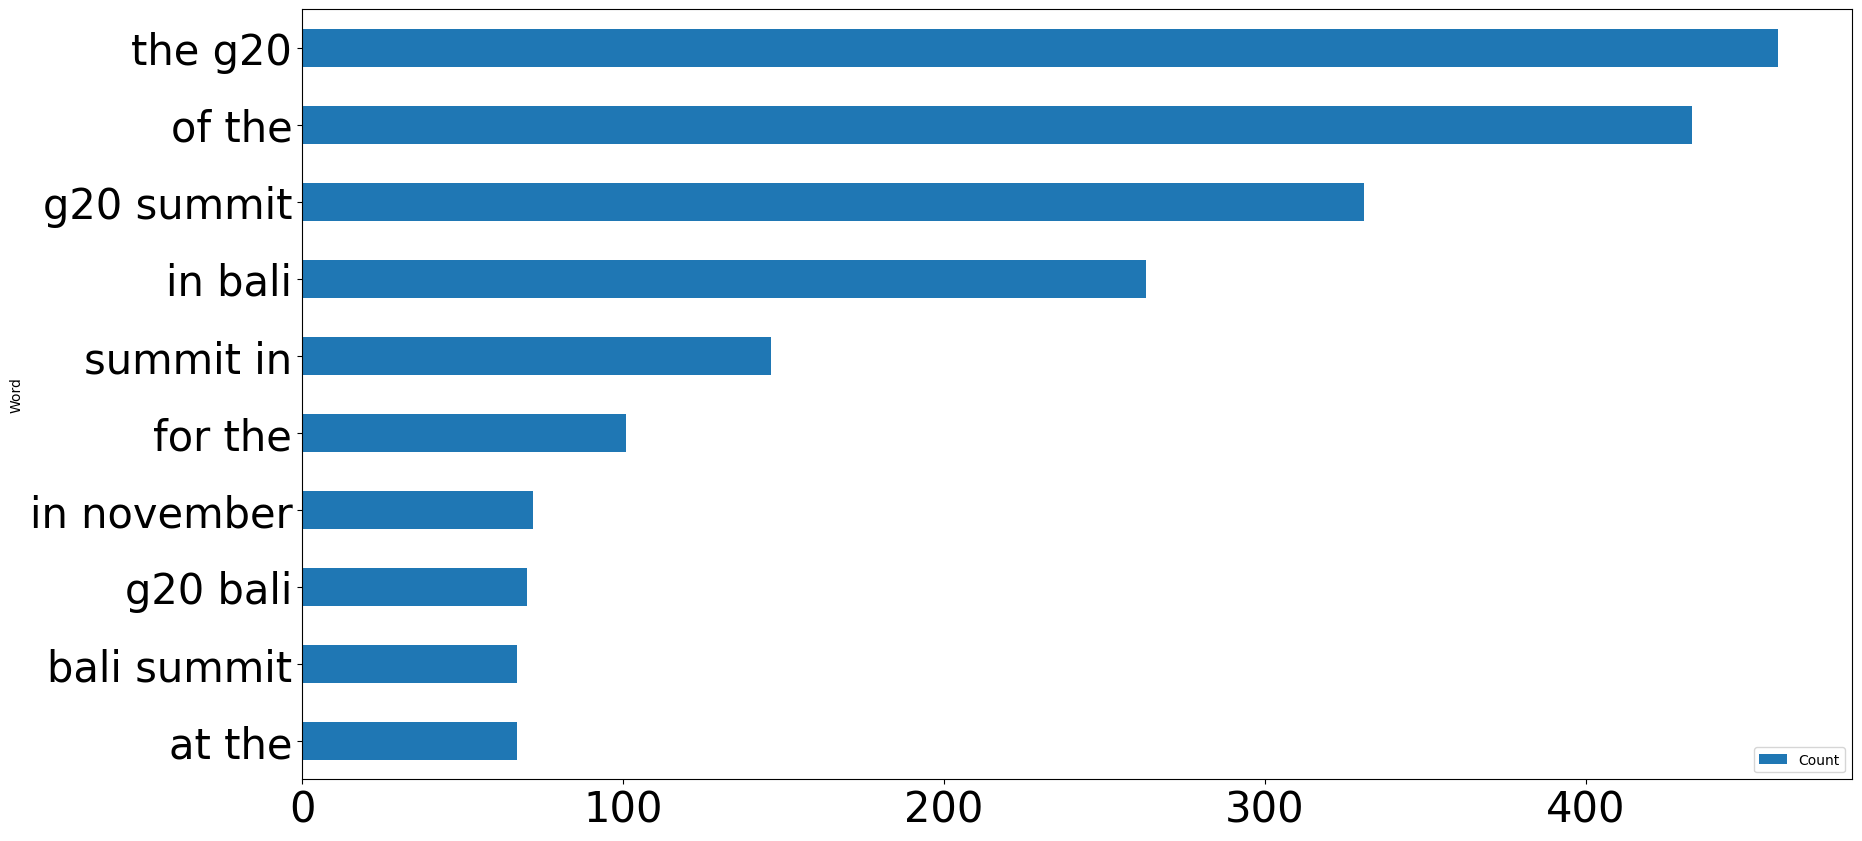

In [31]:
df_top_neutral_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('netral2.png',bbox_inches='tight')

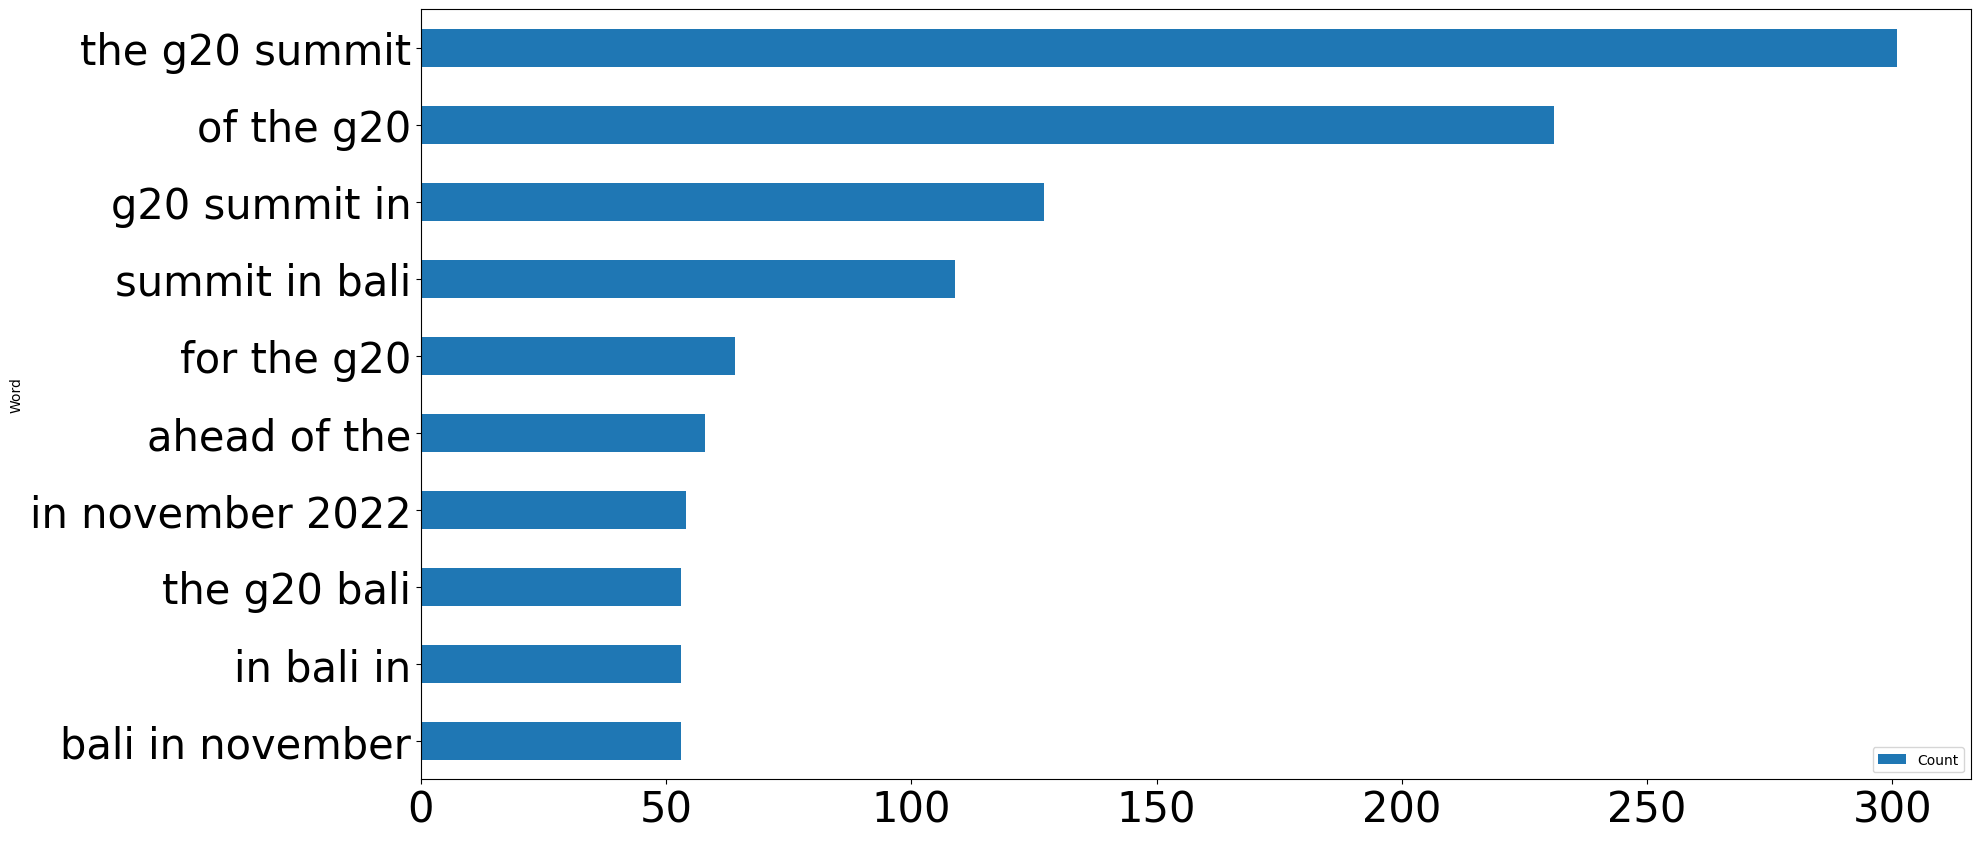

In [32]:
df_top_neutral_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('netral3.png',bbox_inches='tight')